# 빅데이터분석 특강 기말고사 예상문제 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

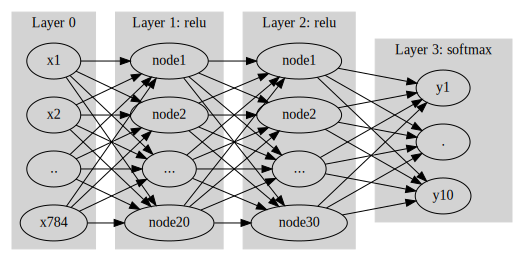

In [ ]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [8]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=10) 

Epoch 1/10
  59/1875 [..............................] - ETA: 4s - loss: 11.2420 - accuracy: 0.1001  

2022-05-28 21:50:41.182344: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 7s 3ms/step - loss: 2.3216 - accuracy: 0.1958
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8249 - accuracy: 0.2370
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8227 - accuracy: 0.2501
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8093 - accuracy: 0.2607
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8135 - accuracy: 0.2627
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8041 - accuracy: 0.2648
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8069 - accuracy: 0.2692
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8057 - accuracy: 0.2699
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7941 - accuracy: 0.2773
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8140 - accurac

`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [13]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 1s 3ms/step - loss: 1.8071 - accuracy: 0.2567


0.2567000091075897

test data의 accuracy: `0.2567000091075897`

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [16]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 2s 9ms/step - loss: 1.4272 - accuracy: 0.3600 - val_loss: 1.4204 - val_accuracy: 0.3747
Epoch 2/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4118 - accuracy: 0.3640 - val_loss: 1.4129 - val_accuracy: 0.3647
Epoch 3/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4082 - accuracy: 0.3606 - val_loss: 1.4141 - val_accuracy: 0.3638
Epoch 4/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4276 - accuracy: 0.3465 - val_loss: 1.4205 - val_accuracy: 0.3573
Epoch 5/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4066 - accuracy: 0.3624 - val_loss: 1.4224 - val_accuracy: 0.3746
Epoch 6/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4160 - accuracy: 0.3565 - val_loss: 1.4130 - val_accuracy: 0.3720
Epoch 7/50
240/240 [==============================] - 2s 10ms/step - loss: 1.4153 - accuracy: 0.3562 - val_loss: 1.4422 - val_accuracy: 0.3452


In [17]:
%tensorboard --logdir logs --host 0.0.0.0

train accuracy와 validation accuracy

training accuracy는 올라가는데 validation accuracy는 그저 그렇다(우리의 목적이 아님)

training loss는 줄어들고 있는데 validation loss는 오히려 커지고 있다.(이상함을 감지)

-> 오버피팅의 징조!!!


`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

(2) (24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

(3)

(4)

(5)